In [4]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#Define Functions
def wholedays(df):
    start = df.index[df['Time']=='0:00:00']
    end=df.index[df['Time']=='23:59:00']
    newdf=df[start[0]:(end[-1]+1)]
    return newdf

def setindex(df):
    df['Date_Time']=df['Date'].astype(str)+' '+df['Time']
    new=df.set_index('Date_Time')
    return new

def spiderraster(df, spider):
    min_day=24*60
    total_time = len(df.index)
    num_days = total_time//min_day
    fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True, sharex=True)
    #setting the y axis limit
    limit=df.replace(0, np.nan)
    std=limit.std()
    mean=limit.mean()
    u=np.mean(mean)
    s=np.mean(std)
    y=u+3*s
    #plotting the raster plots
    for i in range(0,num_days):
        ax[i].plot(df.Time[min_day*i:min_day*(i+1)], df[spider][min_day*i:min_day*(i+1)], color='blue')
        ax[i].set_ylabel('d'+str(i+1))
        ax[i].set_xticks([])
        # the y limit is the mean plus 3 standard deviations
        ax[i].set_ylim(0,y)
        #setting instructions for shading the graph when the lights are off
        dfa=df[min_day*(i):min_day*(i+1)]
        dfa=dfa.reset_index()
        if np.mean(dfa.lights)==0:
            ax[i].axvspan(0,min_day, alpha=.5,color='grey')
        else:
            for j in range(1, len(dfa.index)-1):
                global start1
                global end1
                global start2
                global end2
                if dfa.lights[j] == 1:
                    lights_on = True
                else:
                    lights_on = False
                if lights_on == False and j-1==0:
                    start1 = j
                if lights_on==False and dfa.lights[j-1] == 1:
                    start2 = j
                if lights_on==False and j==( len(dfa.index)-2):
                    end2= j
                if lights_on == False and dfa.lights[j+1] == 1:
                    end1 = j+1
            
            ax[i].axvspan(start1, end1, alpha=0.5, color='grey')
            ax[i].axvspan(start2, end2,alpha=0.5, color='grey')
    ax[num_days-1].set_xticks(range(0, min_day, 180)) 
    plt.xlabel('Time')
    plt.suptitle(spider+' Locomotor Activity')
    #plt.show()
    fig.savefig(spider+'raster.jpg')
    
#spiderraster(df,df.s24)


In [5]:
dfn=pd.read_csv('Practice 4_data2.csv')
newdf=wholedays(dfn)
df=setindex(newdf)
df

<ipython-input-4-0e48d18dae1a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Time']=df['Date'].astype(str)+' '+df['Time']


,Date,Time,lights,s1,s2,s3,s4,s5,s6,s7,...,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32
Date_Time,,,,,,,,,,,,,,,,,,,,,
11-Jun-17 0:00:00,11-Jun-17,0:00:00,0,6,2,0,0,0,0,7,...,5,1,0,0,0,0,0,7,6,0
11-Jun-17 0:01:00,11-Jun-17,0:01:00,0,0,6,0,0,0,0,8,...,0,7,0,4,0,0,0,0,0,0
11-Jun-17 0:02:00,11-Jun-17,0:02:00,0,0,11,0,0,0,0,0,...,0,0,0,17,0,0,0,0,1,0
11-Jun-17 0:03:00,11-Jun-17,0:03:00,0,0,7,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
11-Jun-17 0:04:00,11-Jun-17,0:04:00,0,0,20,0,0,0,5,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27-Jun-17 23:55:00,27-Jun-17,23:55:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,1,0
27-Jun-17 23:56:00,27-Jun-17,23:56:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
27-Jun-17 23:57:00,27-Jun-17,23:57:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,3


In [15]:
column_names = (df.columns.values[3:5]) 
display(type(column_names))
display(column_names[0])

    #column_names[i]='df.'+column_names[i]
    
    
#np.array(column_names)
#array=np.array(column_names)
#for i in range(len(column_names)):
    #spiderraster(df,(column_names[0]))
    
#print(column_names[0])
#a=str(column_names[0])
#print(type(column_names[0]))

#plt.plot(df.Time,df.s1)
#plt.show()

#for i in range(len(column_names)):
    #spiderraster(df,column_names[i])

AttributeError: 'Series' object has no attribute 'columns'

In [7]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
df=df.s26

<AxesSubplot:xlabel='Date_Time'>

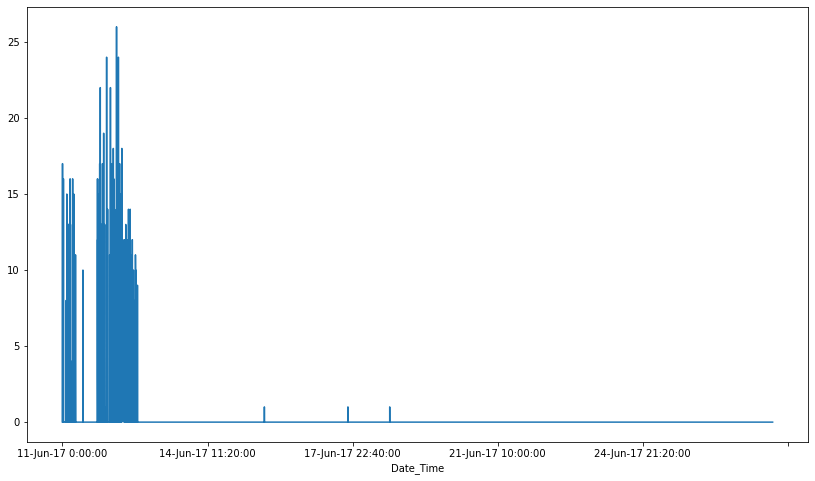

In [8]:
df.plot(figsize=(14,8))

In [9]:
# ADF Test
#Lag=  value of time gap being considered 
#The lag time is the time between the two time series you are correlating.
result = adfuller(df, autolag='AIC')

print('ADF Statistic: %f' % result[0])
#if p-value is less than .05, we reject the null hypothesis and the data is stationary
print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -6.178794
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


In [10]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test(df)

Results of KPSS Test:
Test Statistic            3.710893
p-value                   0.010000
#Lags Used               79.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [11]:
display(df)
dfdiff=np.diff(df)
kpss_test(dfdiff)

Date_Time
11-Jun-17 0:00:00      0
11-Jun-17 0:01:00      4
11-Jun-17 0:02:00     17
11-Jun-17 0:03:00      0
11-Jun-17 0:04:00      0
                      ..
27-Jun-17 23:55:00     0
27-Jun-17 23:56:00     0
27-Jun-17 23:57:00     0
27-Jun-17 23:58:00     0
27-Jun-17 23:59:00     0
Name: s26, Length: 24480, dtype: int64

Results of KPSS Test:
Test Statistic             0.009808
p-value                    0.100000
#Lags Used               414.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [12]:
result = adfuller(dfdiff, autolag='AIC')

print('ADF Statistic: %f' % result[0])
#if p-value is less than .05, we reject the null hypothesis and the data is stationary
print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -37.956551
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


In [13]:
import pandas as pd
from arch.unitroot import PhillipsPerron
def test_stationarity_pp(data):
    """
    Performs the Phillips-Perron (PP) test to check stationarity of a time series.
    Args:
        data (array-like): Input time series data.
    Returns:
        None
    """
    # Perform PP test
    result = PhillipsPerron(data)
    # Extract test statistics and p-value
    test_statistic = result.stat
    p_value = result.pvalue
    # Set significance level
    significance_level = 0.05
    # Print the results
    print("Phillips-Perron Test Results:")
    print("-----------------------------")
    print(f"Test Statistic: {test_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Significance Level: {significance_level}")
    print("-----------------------------")
    # Compare the p-value with the significance level
    if p_value < significance_level:
        print("Conclusion: Reject the null hypothesis (stationary)")
    else:
        print("Conclusion: Fail to reject the null hypothesis (non-stationary)")

In [44]:
# python -m pip install arch
test_stationarity_pp(df)

Phillips-Perron Test Results:
-----------------------------
Test Statistic: -133.5819
P-value: 0.0000
Significance Level: 0.05
-----------------------------
Conclusion: Reject the null hypothesis (stationary)


In [ ]:
plt.plot( df.index[1:],dfdiff)
plt.xticks(range(1,len(df.index)), 1000)
plt.show()

In [23]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
sns.set()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dfn=pd.read_csv('Practice 4_data2.csv')
newdf=wholedays(dfn)
df=setindex(newdf)

df=df.iloc[3:,3:]

df=df.T
display(df)

<ipython-input-14-0e48d18dae1a>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date_Time,11-Jun-17 0:03:00,11-Jun-17 0:04:00,11-Jun-17 0:05:00,11-Jun-17 0:06:00,11-Jun-17 0:07:00,11-Jun-17 0:08:00,11-Jun-17 0:09:00,11-Jun-17 0:10:00,11-Jun-17 0:11:00,11-Jun-17 0:12:00,...,27-Jun-17 23:50:00,27-Jun-17 23:51:00,27-Jun-17 23:52:00,27-Jun-17 23:53:00,27-Jun-17 23:54:00,27-Jun-17 23:55:00,27-Jun-17 23:56:00,27-Jun-17 23:57:00,27-Jun-17 23:58:00,27-Jun-17 23:59:00
s1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s2,7,20,8,5,7,12,4,6,6,6,...,2,0,0,5,0,0,0,0,0,0
s3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s6,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s7,0,4,4,6,1,2,14,3,7,5,...,0,0,0,0,0,0,0,0,0,0
s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s10,0,0,5,5,7,6,2,3,6,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
import plotly.express as px
from sklearn.decomposition import PCA
X = df.iloc[:, 3:]
pca = PCA(n_components= 32)
components = pca.fit_transform(X)
fig = px.scatter(components, x=0, y=1, color=df.index,  labels={'0': 'PC 1', '1': 'PC 2'})
fig.show()